In [51]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


dir1 = [rf"C:\Users\hoang\Code\FIL-based-IDS-using-hybrid-supervised-and-unsupervised-models\Service-based_IL\src\Monitor\{50 + 25*i}kpps-20s.csv" for i in range(0, 10)]

dir2 = [rf"C:\Users\hoang\Code\FIL-based-IDS-using-hybrid-supervised-and-unsupervised-models\Service-based_IL\app_logs\{50+25*i}kpps-20s.jsonl" for i in range(0, 10)]

dfs1 = [pd.read_csv(f) for f in dir1]
dfs2 = [pd.read_json(f, lines=True) for f  in dir2]

print(dfs2[0]["Label"].value_counts())

mean_pipetime = [df["Pipetime"].mean() for df in dfs2 ]
mean_cpu = [df["Total_CPU_%"].mean()/12 for df in dfs1]
mean_ram = [df["Total_RAM_MB"].mean()/78.844 for df in dfs1]

mean_acc = [df["Label"].value_counts()["DDoS"] for df in dfs2]

for index, n in enumerate(mean_acc):
    mean_acc[index] = n / len(dfs2[index]) *100
    
print(mean_acc)

Label
Unknown    597
DDoS       169
Benign      21
DoS          6
Name: count, dtype: int64
[21.311475409836063, 48.30729166666667, 29.61460446247465, 23.60248447204969, 34.87738419618528, 27.953890489913547, 20.0, 25.14792899408284, 18.344519015659955, 20.5078125]


Đã lưu ảnh thành công với độ phân giải 300 DPI!


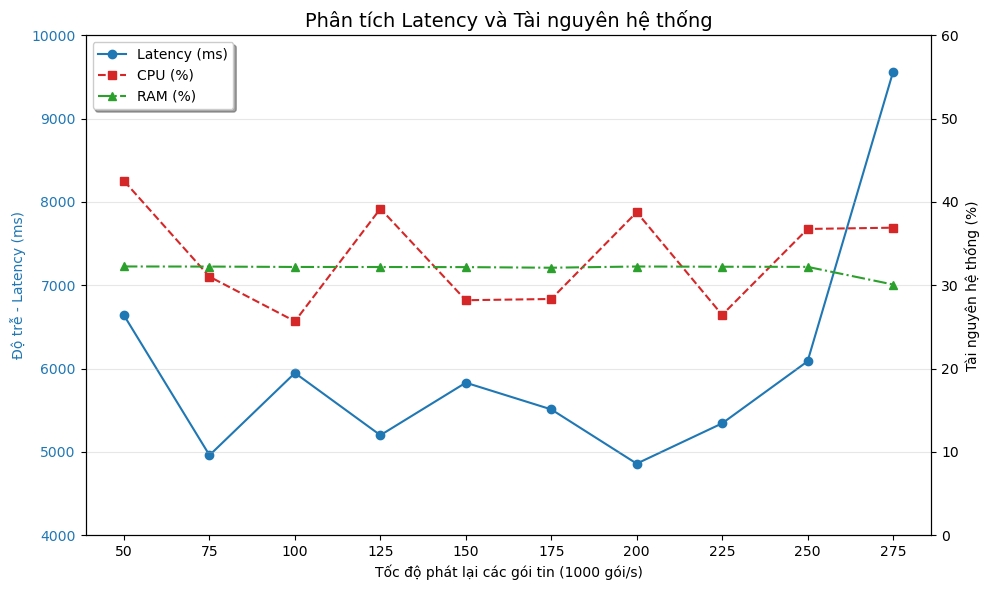

In [55]:
import matplotlib.pyplot as plt

# Giả sử dữ liệu của bạn
x = [50 + 25*i for i in range(0, 10)]
y1 = mean_pipetime
y2 = mean_cpu
y3 = mean_ram
y4 = mean_acc

fig, ax1 = plt.subplots(figsize=(10, 6))

# Trục thứ nhất (Bên trái) cho Latency
color1 = 'tab:blue'
ax1.set_ylim(4000, 10000)
ax1.set_xlabel('Tốc độ phát lại các gói tin (1000 gói/s)')
ax1.set_ylabel('Độ trễ - Latency (ms)', color=color1)
line1 = ax1.plot(x, y1, marker='o', label='Latency (ms)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Tạo trục thứ hai (Bên phải) dùng chung trục X
ax2 = ax1.twinx() 
ax2.set_ylim(0, 60) # đổi scale
color2 = 'tab:red'
ax2.set_ylabel('Tài nguyên hệ thống (%)', color='black')
line2 = ax2.plot(x, y2, marker='s', label='CPU (%)', color=color2, linestyle='--')
line3 = ax2.plot(x, y3, marker='^', label='RAM (%)', color='tab:green', linestyle='-.')
# line4 = ax2.plot(x, y4, marker='*', label='Accuracy (%)', color='tab:purple', linestyle='-.')
ax2.tick_params(axis='y', labelcolor='black')

# Hợp nhất chú thích từ cả 2 trục vào 1 ô duy nhất bên phải trên cùng
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', shadow=True)

plt.title('Phân tích Latency và Tài nguyên hệ thống', fontsize=14)
plt.xticks(x)
plt.grid(True, alpha=0.3)
fig.tight_layout() 

# 2. Lưu ảnh với các tùy chỉnh
plt.savefig(
    'KichbanDDoS.png', # Tên file và định dạng (có thể dùng .pdf, .svg, .jpg)
    dpi=500,                # Độ phân giải (thường dùng 300 cho bản in, 100 cho web)
    bbox_inches='tight',    # Tự động cắt bỏ các khoảng trắng thừa xung quanh
    facecolor='white',      # Màu nền của ảnh
    edgecolor='none'        # Màu viền ảnh
)

print("Đã lưu ảnh thành công với độ phân giải 300 DPI!")

# 3. Hiển thị (Lưu ý: nên lưu trước khi plt.show() vì show() có thể xóa canvas)
plt.show()

In [9]:
command = [f"sudo tcpreplay --pps={50*1000 + 25*1000*i} --loop=0 --limit={(50*1000 + 25*1000*i)*20} --stats=10 -i veth0 DDoS-ICMP_Flood.pcap" for i in range(0, 10)]


for c in command:
    print(c)
    

sudo tcpreplay --pps=50000 --loop=0 --limit=1000000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap
sudo tcpreplay --pps=75000 --loop=0 --limit=1500000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap
sudo tcpreplay --pps=100000 --loop=0 --limit=2000000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap
sudo tcpreplay --pps=125000 --loop=0 --limit=2500000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap
sudo tcpreplay --pps=150000 --loop=0 --limit=3000000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap
sudo tcpreplay --pps=175000 --loop=0 --limit=3500000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap
sudo tcpreplay --pps=200000 --loop=0 --limit=4000000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap
sudo tcpreplay --pps=225000 --loop=0 --limit=4500000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap
sudo tcpreplay --pps=250000 --loop=0 --limit=5000000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap
sudo tcpreplay --pps=275000 --loop=0 --limit=5500000 --stats=10 -i veth0 DDoS-ICMP_Flood.pcap


sudo sysctl -w net.core.rmem_max=134217728
sudo sysctl -w net.core.wmem_max=134217728
sudo sysctl -w net.core.netdev_max_backlog=100000
sudo sysctl -w net.core.optmem_max=2048000
sudo sysctl -w net.ipv4.udp_mem='1024000 8738000 16777216'

In [12]:
command = [f"sudo tcpreplay --pps={50*100 + 25*100*i} --loop=0 --stats=10 -i veth0 BenignTraffic.pcap" for i in range(0, 10)]


for c in command:
    print(c)
    

sudo tcpreplay --pps=5000 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
sudo tcpreplay --pps=7500 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
sudo tcpreplay --pps=10000 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
sudo tcpreplay --pps=12500 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
sudo tcpreplay --pps=15000 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
sudo tcpreplay --pps=17500 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
sudo tcpreplay --pps=20000 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
sudo tcpreplay --pps=22500 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
sudo tcpreplay --pps=25000 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
sudo tcpreplay --pps=27500 --loop=0 --stats=10 -i veth0 BenignTraffic.pcap
